In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pickle

In [2]:
#0, 1, 2
multi_names = ['Hate', 'Neutral', 'Offensive']
#0, 1
binary_names = ["Hate", "Not Hate"]

In [3]:
with open('../../hatexplain_data.pickle', 'rb') as file:
    data = pickle.load(file)

In [4]:
y_train = data["y_train"]
y_test = data["y_test"]
y_train_binary = data["y_train_binary"]
y_test_binary = data["y_test_binary"]

<h4> TF-IDF training and testing variables</h4>

In [5]:
with open('../../saved_embeddings/tfidf_embeddings.pickle', 'rb') as file:
    data = pickle.load(file)

In [6]:
X_train_tfidf = data["X_train_tfidf"]
X_test_tfidf = data["X_test_tfidf"]
X_train_tfidf_binary = data["X_train_tfidf_binary"]
X_test_tfidf_binary = data["X_test_tfidf_binary"]

<h1>TF-IDF Model</h1>

<h3>Variance in performance</h3> 

In [7]:
svm_classifier = SVC(random_state=42)

In [ ]:
#Using validation set to test for variance in accuracy results using k fold validation

# stratified_10_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# cross_val_scores = cross_val_score(svm_classifier, train_X, train_y, cv=stratified_10_fold, scoring='accuracy')
# accuracy_variance = np.var(cross_val_scores)

# # Print the accuracy scores for each fold
# print("Accuracy scores for each fold:", cross_val_scores)

# # Print the variance of the accuracy scores
# print("Variance in accuracy scores:", accuracy_variance)

<h3>Final Classifier</h3>

In [ ]:
svm_classifier.fit(X_train_tfidf, y_train)

In [ ]:
# Prediciting document labels for test data
y_svm_pred_tfidf = svm_classifier.predict(X_test_tfidf)

svm_report = classification_report(y_test, y_svm_pred_tfidf, target_names=multi_names)
print("Report: \n", svm_report)

In [ ]:
# Generate the confusion matrix


cm = confusion_matrix(y_test, y_svm_pred_tfidf)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=multi_names, yticklabels=multi_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

<h3>Final Classifier (Binary Classification)</h3>

In [9]:
svm_classifier.fit(X_train_tfidf_binary, y_train_binary)

SVC(random_state=42)

In [11]:
# Prediciting document labels for test data
y_pred_binary = svm_classifier.predict(X_test_tfidf_binary)

svm_report = classification_report(y_test_binary, y_pred_binary, target_names=binary_names)
print("Report: \n", svm_report)

Report: 
               precision    recall  f1-score   support

        Hate       0.81      0.77      0.79       594
    Not Hate       0.78      0.82      0.80       593

    accuracy                           0.80      1187
   macro avg       0.80      0.80      0.80      1187
weighted avg       0.80      0.80      0.80      1187



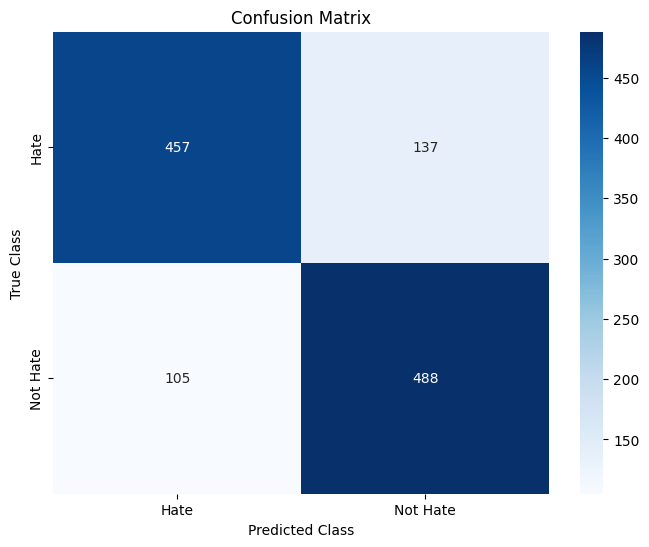

In [12]:
# Generate the confusion matrix


cm = confusion_matrix(y_test_binary, y_pred_binary)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=binary_names, yticklabels=binary_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()